In [6]:
import datetime
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [8]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

In [10]:
import requests
start = datetime.date(2017, 1, 1)
end = datetime.date(2020, 7 , 29)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

results = requests.get(url)
results.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [13]:
data = pd.read_json(results.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)

In [14]:
data.head()

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


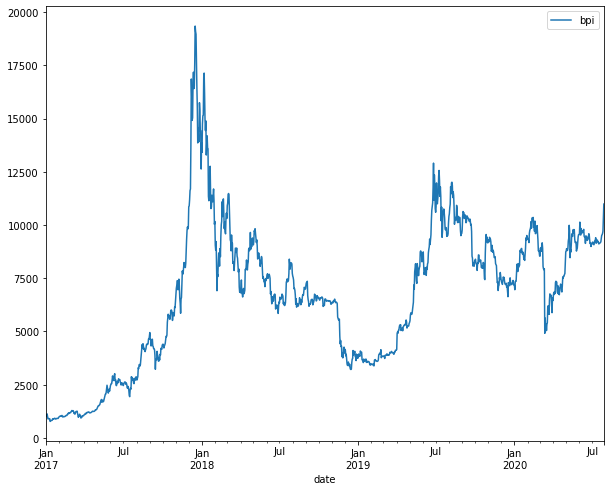

In [15]:
data.plot()

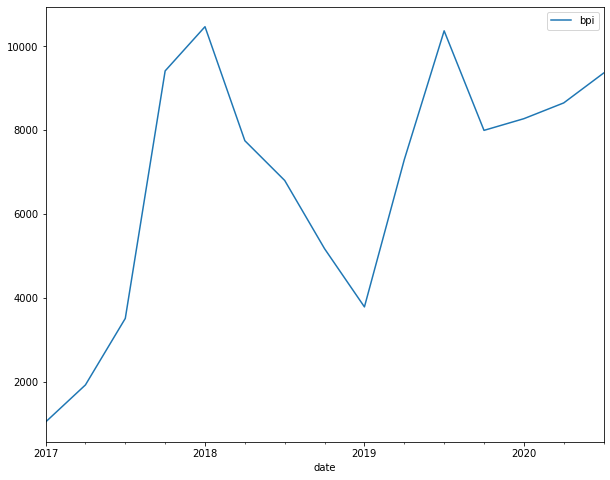

In [16]:
data.resample('Q').mean().plot()

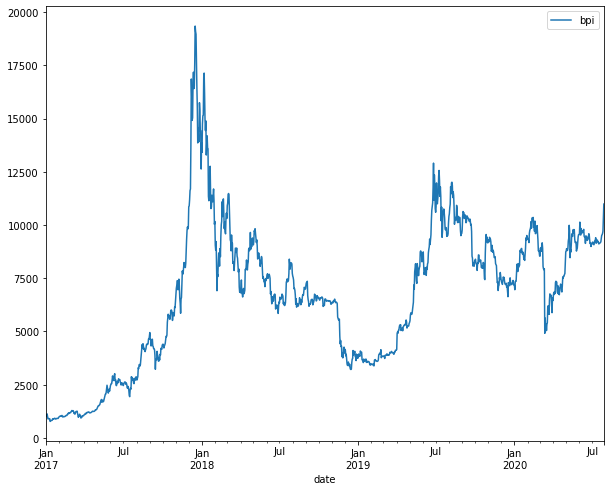

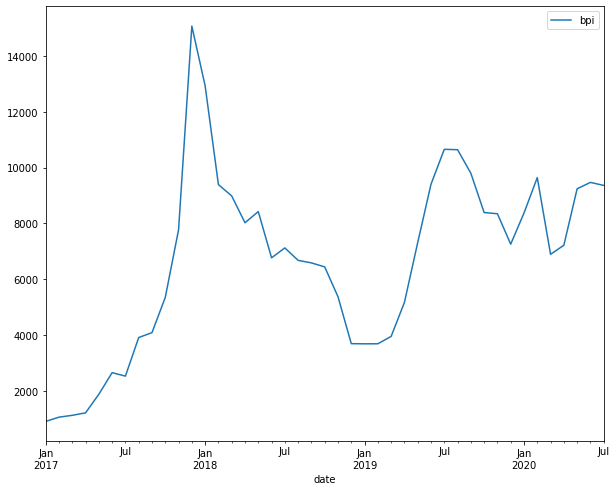

In [17]:
data.plot()
data.resample('M').mean().plot()

In [18]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [19]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [20]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


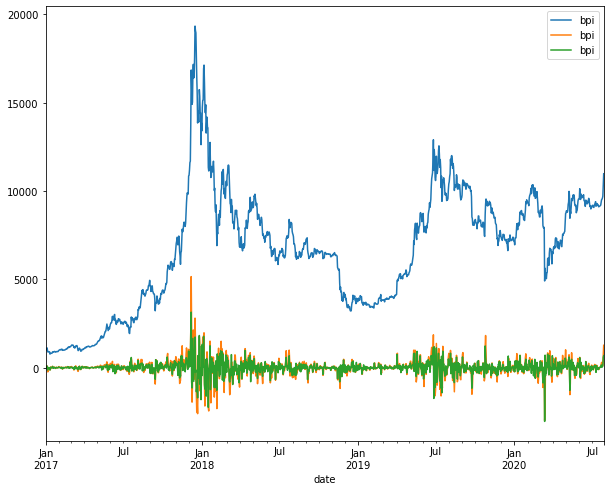

In [21]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis=1).plot()

In [22]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [23]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [25]:
data[:5].tshift(2)

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [26]:
data[:5] = data[:5].shift()

In [27]:
data[:5] - data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,33.1287
2017-01-05,111.8200


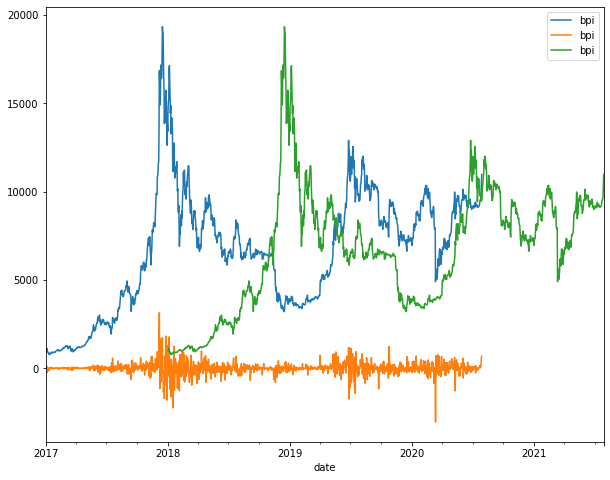

In [28]:
pd.concat([data, data-data.shift(), data.tshift(365)], axis=1).plot()

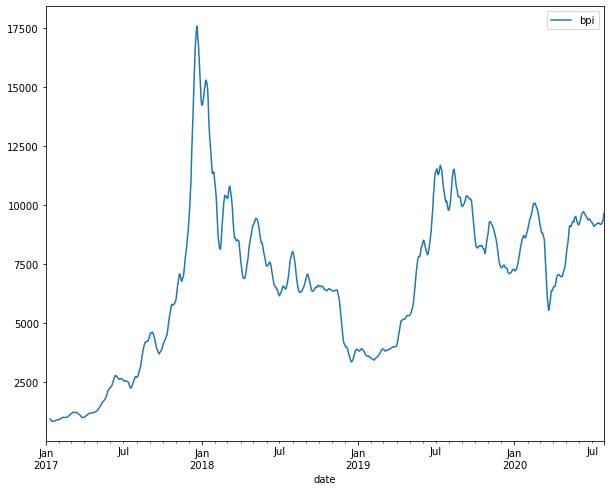

In [29]:
data.rolling(window=10).mean().plot()

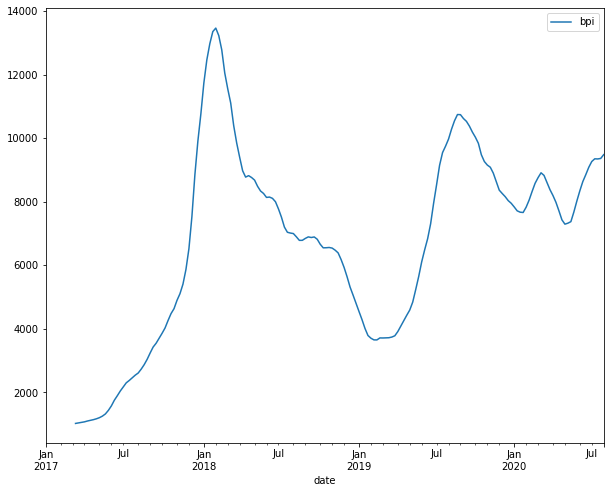

In [30]:
data.resample('W').mean().rolling(window=10).mean().plot()

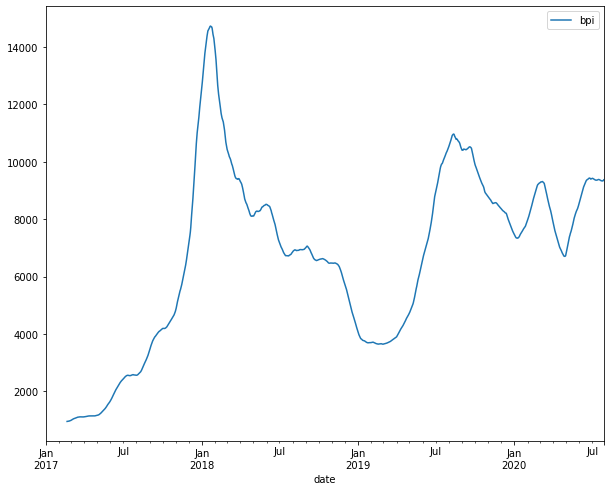

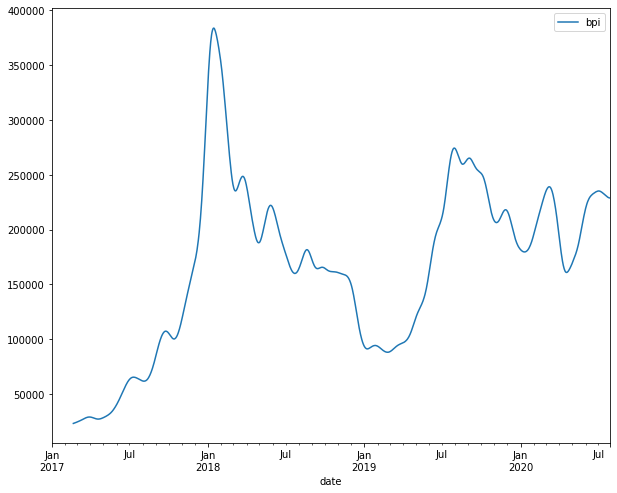

In [31]:
data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot()

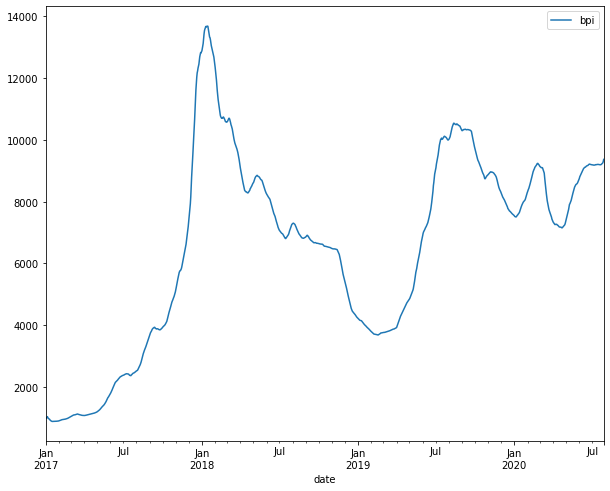

In [33]:
data.ewm(span=50).mean().plot()

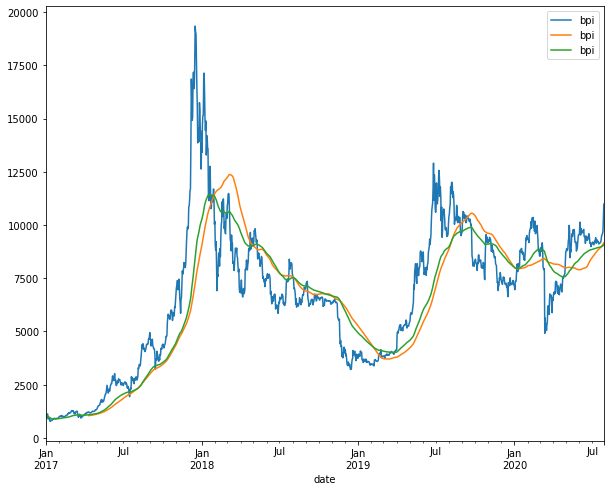

In [34]:
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean()],axis=1).plot()

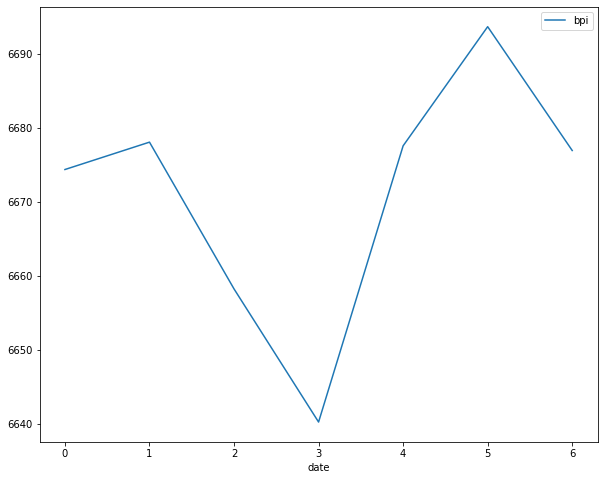

In [44]:
data.groupby(data.index.dayofweek).mean().plot()

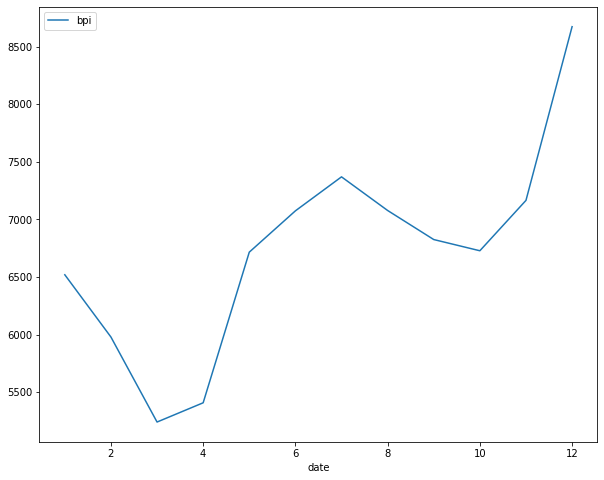

In [43]:
data.groupby(data.index.month).mean().plot()

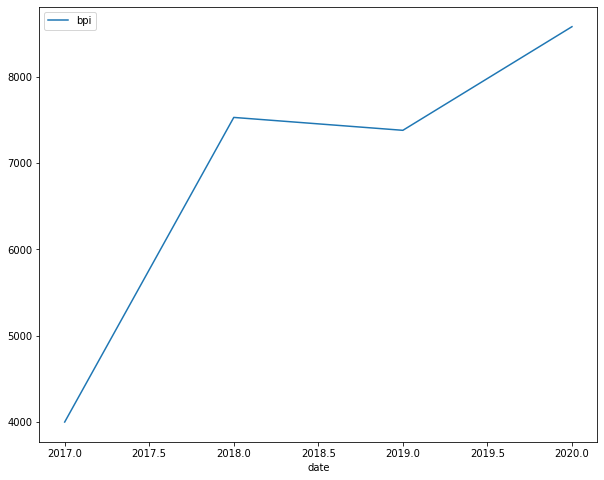

In [42]:
data.groupby(data.index.year).mean().plot()

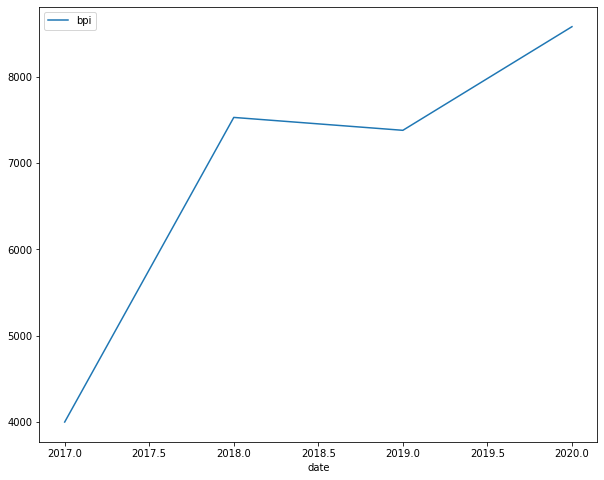

In [45]:
data.groupby(data.index.year).mean().plot()

In [46]:
data[:5]

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [47]:
data[:5].cumsum()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,2015.7388
2017-01-04,3046.5563
2017-01-05,4176.4263


In [48]:
data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,0.033205
2017-01-05,0.109837


In [49]:
data[:5].expanding().sum()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,2015.7388
2017-01-04,3046.5563
2017-01-05,4176.4263


In [50]:
data[:5].expanding().mean()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.688800
2017-01-03,1007.869400
2017-01-04,1015.518767
2017-01-05,1044.106575


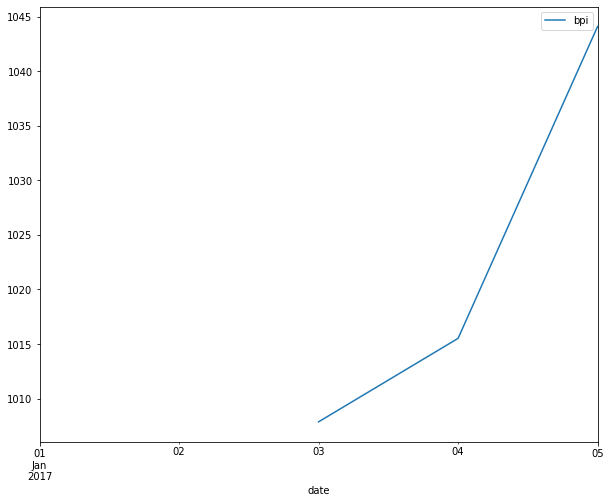

In [51]:
data[:5].expanding(2).mean().plot()